In [1]:
# Trick to automatically reload some pacakges
%load_ext autoreload

In [2]:
import warnings
warnings.filterwarnings('ignore')

import ROOT
%jsroot off

import hepplotting as plt

Welcome to JupyROOT 6.14/04


In [3]:
# Tell autoreload which package to reload
%autoreload 1
%aimport hepplotting
counter = -1

In [6]:
bkg_name = ['bkg1','bkg2','bkg3']

bkg_legname = {
    'bkg1': 'Bkg_{1} (m_{#chi}=10 GeV)',
    'bkg2': 'Bkg^{2}'                  ,
    'bkg3': 'Bkg_{3} #alpha=1/137'     ,
}

bkg_color = {
    'bkg1' : 868,
    'bkg2' : 867,
    'bkg3' : 866,
}

def get_random_histo(name):
    global counter
    h=ROOT.TH1F(name,name,50,-5,10)
    h.FillRandom('gaus',250)
    h.SetName(h.GetName()+'_tmp{}'.format(counter))
    counter+=1
    return h

dictBkg = {b:[get_random_histo(b),bkg_color[b],bkg_legname[b]] for b in bkg_name}
hData   = plt.sum_histograms([get_random_histo('Data') for i in range(0,3)])
hTot    = plt.sum_histograms( [v[0] for v in dictBkg.values()] )

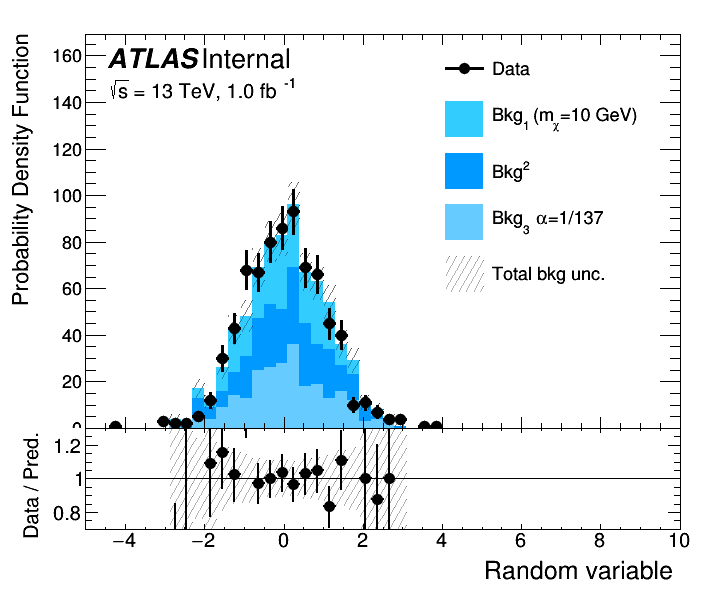

In [7]:
plt.make_nice_canvas(dictBkg,hTot,hData,plot_name='Example_plot',
                    ytitle='Probability Density Function',
                    xtitle='Random variable',plot_ratio=True,can_scale=0.8,
                    r_ymin=0.7,r_ymax=1.3)